## Week 2 - Project: Sales & Customer Behaviour Insights – Green Cart Ltd.

### 1.Importing and cleaning files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer_df = pd.read_csv('customer_info.csv')
product_df = pd.read_csv('product_info.csv')
sales_df = pd.read_csv('sales_data.csv')

#### Customer Data

In [3]:
customer_df.head()

,customer_id,email,signup_date,gender,region,loyalty_tier
0,C00001,shaneramirez@gmail.com,26-04-25,Male,Central,Silver
1,C00002,jpeterson@bernard.com,11-08-24,Female,Central,gold
2,C00003,howardmaurice@yahoo.com,15-05-25,male,Central,gold
3,C00004,yherrera@arnold.org,14-06-25,FEMALE,Central,GOLD
4,C00005,janetwilliams@gmail.com,02-05-25,Male,West,bronze


In [4]:
customer_df.shape

(500, 6)

In [5]:
customer_df.describe() #Decided to fill in missing values. 

,customer_id,email,signup_date,gender,region,loyalty_tier
count,497,494,496,496,497,498
unique,497,494,271,6,5,7
top,C00001,shaneramirez@gmail.com,10-08-24,femle,East,GOLD
freq,1,1,7,92,103,149


In [6]:
customer_df.dtypes

customer_id     object
email           object
signup_date     object
gender          object
region          object
loyalty_tier    object
dtype: object

In [7]:
customer_df.loc[customer_df['customer_id'].isnull()]

,customer_id,email,signup_date,gender,region,loyalty_tier
253,NaN,mark16@parker.com,22-02-25,femle,South,bronze
371,NaN,ohayes@gmail.com,09-12-24,Other,Central,Silver
470,NaN,nancygonzalez@wright.com,27-06-25,Male,Central,Silver


In [8]:
customer_df.loc[253, 'customer_id'] = 'C00253'
customer_df.loc[371, 'customer_id'] = 'C00371'
customer_df.loc[470, 'customer_id'] = 'C00470'
# Fill in the missing values for 'customer_id' with appropriate values

In [9]:
customer_df.loc[customer_df['email'].isnull()]

,customer_id,email,signup_date,gender,region,loyalty_tier
87,C00088,NaN,06-01-25,male,West,bronze
147,C00148,NaN,02-03-25,Male,West,GOLD
303,C00304,NaN,02-11-24,Male,East,GOLD
339,C00340,NaN,24-03-25,male,Central,bronze
375,C00376,NaN,12-07-24,femle,South,bronze
469,C00470,NaN,17-07-24,femle,North,Silver


In [10]:
customer_df.email = customer_df.email.fillna(customer_df.customer_id + '@Unknown.com')
# Fill in the missing values for 'email' with a placeholder

In [11]:
customer_df.loc[customer_df['signup_date'].isnull()]

,customer_id,email,signup_date,gender,region,loyalty_tier
16,C00017,nathanielmartin@sellers.com,NaN,Male,West,GOLD
225,C00226,victorhughes@wilson.com,NaN,Male,East,gold
345,C00346,williamstone@hotmail.com,NaN,Male,NaN,GOLD
440,C00441,sean43@steele.com,NaN,FEMALE,South,bronze


In [12]:
customer_df.gender.unique()
#Checking uniquwe values and formatting before fillinhg in missing values

array(['Male', 'Female', 'male', 'FEMALE', 'Other', 'femle', nan],
      dtype=object)

In [13]:
customer_df.gender = customer_df.gender.str.title()
customer_df.gender = customer_df.gender.str.replace('Femle', 'Female')
customer_df.gender = customer_df.gender.fillna('Unknown')

In [14]:
customer_df.region.unique()

array(['Central', 'West', 'North', 'South', 'East', nan], dtype=object)

In [15]:
customer_df.region = customer_df.region.fillna('Unknown')

In [16]:
customer_df.loyalty_tier.unique()

array(['Silver', ' gold ', 'GOLD', 'bronze', 'gld', nan, 'brnze',
       'sllver'], dtype=object)

In [17]:
customer_df.loyalty_tier = customer_df.loyalty_tier.str.replace('gld', 'Gold')
customer_df.loyalty_tier = customer_df.loyalty_tier.str.replace(' gold ', 'Gold')
customer_df.loyalty_tier = customer_df.loyalty_tier.str.replace('brnze', 'Bronze')
customer_df.loyalty_tier = customer_df.loyalty_tier.str.replace('sllver', 'Silver')
customer_df.loyalty_tier = customer_df.loyalty_tier.fillna('Unknown')
customer_df.loyalty_tier = customer_df.loyalty_tier.str.title()

In [18]:
customer_df.signup_date = pd.to_datetime(customer_df.signup_date, format = 'mixed')

In [19]:
customer_df.duplicated().sum()

0

In [20]:
customer_df.dtypes

customer_id             object
email                   object
signup_date     datetime64[ns]
gender                  object
region                  object
loyalty_tier            object
dtype: object

#### Sales Data

In [21]:
sales_df.head()

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied
0,O966977,C00397,P0022,3,39.25,06-07-25,Delivered,PayPal,Central,0.00
1,O696648,C00236,P0023,5,18.92,06-07-25,DELAYED,credit card,North,0.00
2,O202644,C00492,P0011,1,29.68,06-07-25,delivered,Bank Transfer,North,0.15
3,O501803,C00031,P0003,1,32.76,06-07-25,Cancelled,Credit Card,Central,0.20
4,O322242,C00495,P0016,1,47.62,06-07-25,DELAYED,Credit Card,West,0.20


In [22]:
sales_df.head()

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied
0,O966977,C00397,P0022,3,39.25,06-07-25,Delivered,PayPal,Central,0.00
1,O696648,C00236,P0023,5,18.92,06-07-25,DELAYED,credit card,North,0.00
2,O202644,C00492,P0011,1,29.68,06-07-25,delivered,Bank Transfer,North,0.15
3,O501803,C00031,P0003,1,32.76,06-07-25,Cancelled,Credit Card,Central,0.20
4,O322242,C00495,P0016,1,47.62,06-07-25,DELAYED,Credit Card,West,0.20


In [23]:
sales_df.shape

(3000, 10)

In [24]:
sales_df.dtypes

order_id             object
customer_id          object
product_id           object
quantity             object
unit_price          float64
order_date           object
delivery_status      object
payment_method       object
region               object
discount_applied    float64
dtype: object

In [25]:
sales_df.isnull().sum()

order_id              1
customer_id           2
product_id            5
quantity              3
unit_price            1
order_date            3
delivery_status       3
payment_method        3
region                0
discount_applied    517
dtype: int64

In [26]:
sales_df.quantity.unique()

array(['3', '5', '1', '2', '4', nan, 'three', 'five'], dtype=object)

In [27]:
sales_df.quantity.describe()

count     2997
unique       7
top          2
freq       635
Name: quantity, dtype: object

In [28]:
sales_df.quantity = sales_df.quantity.str.replace('three', '3')
sales_df.quantity = sales_df.quantity.str.replace('five', '5')
sales_df.quantity = sales_df.quantity.fillna('2')

In [29]:
sales_df.order_date.unique()

array(['06-07-25', nan], dtype=object)

In [30]:
sales_df.order_date = sales_df.order_date.fillna('06-07-25')

In [31]:
sales_df.delivery_status.unique()

array(['Delivered', ' DELAYED', 'delivered', ' Cancelled ', 'Delayed',
       'delrd', 'delyd', nan], dtype=object)

In [32]:
sales_df.delivery_status = sales_df.delivery_status.str.replace(' DELAYED', 'Delayed')
sales_df.delivery_status= sales_df.delivery_status.str.replace(' Cancelled ', 'Cancelled')
sales_df.delivery_status= sales_df.delivery_status.str.replace('delrd', 'Delivered')
sales_df.delivery_status= sales_df.delivery_status.str.replace('delyd', 'Delayed')
sales_df.delivery_status = sales_df.delivery_status.fillna('Unknown')
sales_df.delivery_status = sales_df.delivery_status.str.title()

In [33]:
sales_df.payment_method.unique()

array(['PayPal', 'credit card', 'Bank Transfer', 'Credit Card', nan,
       'bank transfr'], dtype=object)

In [34]:
sales_df.payment_method = sales_df.payment_method.str.replace('bank transfr', 'Bank Transfer')
sales_df.payment_method = sales_df.payment_method.str.replace('credit card', 'Credit Card')
sales_df.payment_method = sales_df.payment_method.fillna('Unknown')

In [35]:
sales_df.region.unique()

array(['Central', 'North', 'West', 'East', 'South', 'nrth'], dtype=object)

In [36]:
sales_df.region = sales_df.region.str.replace('nrth', 'North')

In [37]:
sales_df.discount_applied.unique()

array([0.  , 0.15, 0.2 , 0.1 , 0.05,  nan])

In [38]:
sales_df.discount_applied.describe()

count    2483.000000
mean        0.100262
std         0.069987
min         0.000000
25%         0.050000
50%         0.100000
75%         0.150000
max         0.200000
Name: discount_applied, dtype: float64

In [39]:
sales_df.discount_applied.value_counts()

discount_applied
0.15    510
0.10    506
0.05    505
0.20    483
0.00    479
Name: count, dtype: int64

In [40]:
sales_df.discount_applied = sales_df.discount_applied.fillna(0.10)
# Filling with average value

In [41]:
sales_df.discount_applied.unique()

array([0.  , 0.15, 0.2 , 0.1 , 0.05])

In [42]:
#Dropping remaining values as there is sufficient Data 
sales_df.dropna(inplace=True)

In [43]:
sales_df.shape #Lost 9 rows due to missing order id, customer id and product id

(2991, 10)

In [44]:
sales_df.duplicated().sum()

0

In [45]:
sales_df.order_date = pd.to_datetime(sales_df.order_date, format ='mixed')
sales_df['quantity'] = sales_df['quantity'].astype(str).astype('int64')

In [46]:
sales_df.dtypes

order_id                    object
customer_id                 object
product_id                  object
quantity                     int64
unit_price                 float64
order_date          datetime64[ns]
delivery_status             object
payment_method              object
region                      object
discount_applied           float64
dtype: object

#### Product info

In [47]:
product_df.head()

,product_id,product_name,category,launch_date,base_price,supplier_code
0,P0001,Storage Product 39,Storage,11-03-25,15.88,S339
1,P0002,Cleaning Product 82,Cleaning,18-08-24,34.23,S974
2,P0003,Cleaning Product 85,Cleaning,15-07-24,7.92,S745
3,P0004,Kitchen Product 82,Kitchen,19-04-25,9.13,S589
4,P0005,Personal Care Product 1,Personal Care,20-10-24,31.10,S559


In [48]:
product_df.shape

(30, 6)

In [49]:
product_df.dtypes

product_id        object
product_name      object
category          object
launch_date       object
base_price       float64
supplier_code     object
dtype: object

In [50]:
product_df.isna().sum()

product_id       0
product_name     0
category         0
launch_date      0
base_price       0
supplier_code    0
dtype: int64

In [51]:
product_df.product_name.unique()

array(['Storage Product 39', 'Cleaning Product 82', 'Cleaning Product 85',
       'Kitchen Product 82', 'Personal Care Product 1',
       'Cleaning Product 16', 'Personal Care Product 64',
       'Storage Product 47', 'Outdoors Product 13', 'Cleaning Product 70',
       'Kitchen Product 53', 'Cleaning Product 29', 'Cleaning Product 94',
       'Outdoors Product 91', 'Storage Product 10', 'Cleaning Product 53',
       'Personal Care Product 11', 'Storage Product 37',
       'Kitchen Product 42', 'Cleaning Product 40', 'Kitchen Product 70',
       'Cleaning Product 86', 'Outdoors Product 32', 'Storage Product 87',
       'Cleaning Product 84', 'Storage Product 50', 'Outdoors Product 55',
       'Outdoors Product 53', 'Cleaning Product 69',
       'Cleaning Product 72'], dtype=object)

In [52]:
product_df.category.unique()

array(['Storage', 'Cleaning', 'Kitchen', 'Personal Care', 'Outdoors'],
      dtype=object)

In [53]:
product_df.launch_date.unique()

array(['11-03-25', '18-08-24', '15-07-24', '19-04-25', '20-10-24',
       '09-10-24', '30-09-24', '29-08-24', '18-04-25', '14-08-24',
       '25-03-25', '17-06-25', '02-02-25', '08-08-24', '20-02-25',
       '16-12-24', '18-07-24', '17-07-24', '11-08-24', '28-09-24',
       '04-10-24', '18-01-25', '24-02-25', '16-07-24', '08-02-25',
       '21-09-24', '10-04-25', '15-03-25', '04-04-25'], dtype=object)

In [54]:
product_df.base_price.unique()

array([15.88, 34.23,  7.92,  9.13, 31.1 , 36.06, 33.63, 31.96,  8.  ,
       17.72, 11.08, 14.67, 36.52, 13.22, 39.21, 26.71, 16.46,  6.08,
       30.3 , 30.27, 20.23, 19.77, 36.04, 26.33, 15.24, 27.06, 23.05,
       34.28, 23.41,  9.77])

In [55]:
product_df.supplier_code.unique()

array(['S339', 'S974', 'S745', 'S589', 'S559', 'S980', 'S379', 'S788',
       'S695', 'S321', 'S645', 'S481', 'S914', 'S876', 'S466', 'S715',
       'S594', 'S767', 'S993', 'S492', 'S643', 'S924', 'S907', 'S558',
       'S503', 'S952', 'S127', 'S587', 'S424', 'S455'], dtype=object)

In [56]:
product_df.duplicated().sum()

0

In [57]:
product_df.launch_date = pd.to_datetime(product_df.launch_date, format = 'mixed')

### 2.Merging the Data

In [58]:
combined_df = pd.merge(sales_df, product_df, on='product_id', how='left')
combined_df

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied,product_name,category,launch_date,base_price,supplier_code
0,O966977,C00397,P0022,3,39.25,2025-06-07,Delivered,PayPal,Central,0.00,Cleaning Product 86,Cleaning,2024-04-10,19.77,S924
1,O696648,C00236,P0023,5,18.92,2025-06-07,Delayed,Credit Card,North,0.00,Outdoors Product 32,Outdoors,2025-01-18,36.04,S907
2,O202644,C00492,P0011,1,29.68,2025-06-07,Delivered,Bank Transfer,North,0.15,Kitchen Product 53,Kitchen,2025-03-25,11.08,S645
3,O501803,C00031,P0003,1,32.76,2025-06-07,Cancelled,Credit Card,Central,0.20,Cleaning Product 85,Cleaning,2024-07-15,7.92,S745
4,O322242,C00495,P0016,1,47.62,2025-06-07,Delayed,Credit Card,West,0.20,Cleaning Product 53,Cleaning,2025-02-20,26.71,S715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2986,O868860,C00233,P0001,5,43.40,2025-06-07,Delivered,Bank Transfer,West,0.20,Storage Product 39,Storage,2025-11-03,15.88,S339
2987,O949709,C00246,P0029,4,34.04,2025-06-07,Delayed,Bank Transfer,West,0.20,Cleaning Product 69,Cleaning,2025-03-15,23.41,S424
2988,O763639,C00182,P0026,1,42.34,2025-06-07,Delivered,Credit Card,South,0.00,Storage Product 50,Storage,2025-08-02,27.06,S952
2989,O753958,C00074,P0003,5,35.96,2025-06-07,Delivered,Credit Card,Central,0.00,Cleaning Product 85,Cleaning,2024-07-15,7.92,S745


In [59]:
merged_df = pd.merge(combined_df, customer_df, on='customer_id', how='left')
merged_df

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region_x,discount_applied,product_name,category,launch_date,base_price,supplier_code,email,signup_date,gender,region_y,loyalty_tier
0,O966977,C00397,P0022,3,39.25,2025-06-07,Delivered,PayPal,Central,0.00,Cleaning Product 86,Cleaning,2024-04-10,19.77,S924,jacquelinemartin@mills-logan.com,2024-08-09,Female,North,Silver
1,O696648,C00236,P0023,5,18.92,2025-06-07,Delayed,Credit Card,North,0.00,Outdoors Product 32,Outdoors,2025-01-18,36.04,S907,georgeweber@morgan.com,2024-06-08,Other,North,Gold
2,O202644,C00492,P0011,1,29.68,2025-06-07,Delivered,Bank Transfer,North,0.15,Kitchen Product 53,Kitchen,2025-03-25,11.08,S645,lcook@walters-smith.com,2024-09-25,Male,Central,Gold
3,O501803,C00031,P0003,1,32.76,2025-06-07,Cancelled,Credit Card,Central,0.20,Cleaning Product 85,Cleaning,2024-07-15,7.92,S745,smoore@gmail.com,2024-07-28,Female,Central,Gold
4,O322242,C00495,P0016,1,47.62,2025-06-07,Delayed,Credit Card,West,0.20,Cleaning Product 53,Cleaning,2025-02-20,26.71,S715,mcclainkatherine@hotmail.com,2024-09-18,Male,Central,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3007,O868860,C00233,P0001,5,43.40,2025-06-07,Delivered,Bank Transfer,West,0.20,Storage Product 39,Storage,2025-11-03,15.88,S339,ryanbartlett@guerra.com,2024-01-11,Other,Central,Silver
3008,O949709,C00246,P0029,4,34.04,2025-06-07,Delayed,Bank Transfer,West,0.20,Cleaning Product 69,Cleaning,2025-03-15,23.41,S424,brandywilliams@simpson-khan.info,2024-10-24,Male,South,Gold
3009,O763639,C00182,P0026,1,42.34,2025-06-07,Delivered,Credit Card,South,0.00,Storage Product 50,Storage,2025-08-02,27.06,S952,michael23@thomas.com,2025-02-24,Other,South,Gold
3010,O753958,C00074,P0003,5,35.96,2025-06-07,Delivered,Credit Card,Central,0.00,Cleaning Product 85,Cleaning,2024-07-15,7.92,S745,shawnrogers@yahoo.com,2024-10-22,Male,North,Bronze


In [60]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3012 entries, 0 to 3011
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          3012 non-null   object        
 1   customer_id       3012 non-null   object        
 2   product_id        3012 non-null   object        
 3   quantity          3012 non-null   int64         
 4   unit_price        3012 non-null   float64       
 5   order_date        3012 non-null   datetime64[ns]
 6   delivery_status   3012 non-null   object        
 7   payment_method    3012 non-null   object        
 8   region_x          3012 non-null   object        
 9   discount_applied  3012 non-null   float64       
 10  product_name      3012 non-null   object        
 11  category          3012 non-null   object        
 12  launch_date       3012 non-null   datetime64[ns]
 13  base_price        3012 non-null   float64       
 14  supplier_code     3012 n

In [61]:
merged_df.head(10)

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region_x,discount_applied,product_name,category,launch_date,base_price,supplier_code,email,signup_date,gender,region_y,loyalty_tier
0,O966977,C00397,P0022,3,39.25,2025-06-07,Delivered,PayPal,Central,0.00,Cleaning Product 86,Cleaning,2024-04-10,19.77,S924,jacquelinemartin@mills-logan.com,2024-08-09,Female,North,Silver
1,O696648,C00236,P0023,5,18.92,2025-06-07,Delayed,Credit Card,North,0.00,Outdoors Product 32,Outdoors,2025-01-18,36.04,S907,georgeweber@morgan.com,2024-06-08,Other,North,Gold
2,O202644,C00492,P0011,1,29.68,2025-06-07,Delivered,Bank Transfer,North,0.15,Kitchen Product 53,Kitchen,2025-03-25,11.08,S645,lcook@walters-smith.com,2024-09-25,Male,Central,Gold
3,O501803,C00031,P0003,1,32.76,2025-06-07,Cancelled,Credit Card,Central,0.20,Cleaning Product 85,Cleaning,2024-07-15,7.92,S745,smoore@gmail.com,2024-07-28,Female,Central,Gold
4,O322242,C00495,P0016,1,47.62,2025-06-07,Delayed,Credit Card,West,0.20,Cleaning Product 53,Cleaning,2025-02-20,26.71,S715,mcclainkatherine@hotmail.com,2024-09-18,Male,Central,Gold
5,O190175,C00388,P0005,3,37.89,2025-06-07,Delayed,Bank Transfer,North,0.10,Personal Care Product 1,Personal Care,2024-10-20,31.10,S559,abbottdominique@yahoo.com,2024-09-23,Male,North,Gold
6,O272646,C00328,P0027,5,30.83,2025-06-07,Delivered,PayPal,Central,0.05,Outdoors Product 55,Outdoors,2024-09-21,23.05,S127,adamsnorman@moore.com,2024-08-07,Female,Central,Gold
7,O411881,C00201,P0019,3,12.56,2025-06-07,Delivered,Credit Card,East,0.00,Kitchen Product 42,Kitchen,2024-07-17,30.30,S993,christopher24@whitehead-hernandez.biz,2024-10-08,Female,East,Gold
8,O170570,C00076,P0030,3,28.32,2025-06-07,Delivered,PayPal,Central,0.15,Cleaning Product 72,Cleaning,2025-04-04,9.77,S455,jeffrey10@herring.com,2025-04-03,Female,North,Gold
9,O619944,C00330,P0002,1,30.96,2025-06-07,Delayed,Credit Card,South,0.15,Cleaning Product 82,Cleaning,2024-08-18,34.23,S974,ryanhawkins@russell.com,2025-02-22,Other,West,Bronze


### 3.Feature Engineering

In [62]:
merged_df['revenue'] = (merged_df['quantity'] * merged_df['unit_price']) * (1-merged_df['discount_applied'])

In [63]:
merged_df['order_week'] = merged_df['order_date'].dt.isocalendar().week

In [64]:
merged_df.head()

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region_x,discount_applied,...,launch_date,base_price,supplier_code,email,signup_date,gender,region_y,loyalty_tier,revenue,order_week
0,O966977,C00397,P0022,3,39.25,2025-06-07,Delivered,PayPal,Central,0.00,...,2024-04-10,19.77,S924,jacquelinemartin@mills-logan.com,2024-08-09,Female,North,Silver,117.750,23
1,O696648,C00236,P0023,5,18.92,2025-06-07,Delayed,Credit Card,North,0.00,...,2025-01-18,36.04,S907,georgeweber@morgan.com,2024-06-08,Other,North,Gold,94.600,23
2,O202644,C00492,P0011,1,29.68,2025-06-07,Delivered,Bank Transfer,North,0.15,...,2025-03-25,11.08,S645,lcook@walters-smith.com,2024-09-25,Male,Central,Gold,25.228,23
3,O501803,C00031,P0003,1,32.76,2025-06-07,Cancelled,Credit Card,Central,0.20,...,2024-07-15,7.92,S745,smoore@gmail.com,2024-07-28,Female,Central,Gold,26.208,23
4,O322242,C00495,P0016,1,47.62,2025-06-07,Delayed,Credit Card,West,0.20,...,2025-02-20,26.71,S715,mcclainkatherine@hotmail.com,2024-09-18,Male,Central,Gold,38.096,23


In [65]:
merged_df['price_band'] = pd.cut(merged_df['unit_price'], bins=[0, 14.99, 30, np.inf], labels=['Low', 'Medium', 'High'])

In [66]:
merged_df['day_to_order'] = (merged_df['order_date'] - merged_df['launch_date']).dt.days

In [67]:
merged_df['email_domain'] = merged_df['email'].str.split('@').str[1]

In [68]:
merged_df['is_late'] = merged_df['delivery_status'].apply(lambda x: 'True'  if x == 'Delayed' else 'False')

In [69]:
merged_df.head()

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region_x,discount_applied,...,signup_date,gender,region_y,loyalty_tier,revenue,order_week,price_band,day_to_order,email_domain,is_late
0,O966977,C00397,P0022,3,39.25,2025-06-07,Delivered,PayPal,Central,0.00,...,2024-08-09,Female,North,Silver,117.750,23,High,423,mills-logan.com,False
1,O696648,C00236,P0023,5,18.92,2025-06-07,Delayed,Credit Card,North,0.00,...,2024-06-08,Other,North,Gold,94.600,23,Medium,140,morgan.com,True
2,O202644,C00492,P0011,1,29.68,2025-06-07,Delivered,Bank Transfer,North,0.15,...,2024-09-25,Male,Central,Gold,25.228,23,Medium,74,walters-smith.com,False
3,O501803,C00031,P0003,1,32.76,2025-06-07,Cancelled,Credit Card,Central,0.20,...,2024-07-28,Female,Central,Gold,26.208,23,High,327,gmail.com,False
4,O322242,C00495,P0016,1,47.62,2025-06-07,Delayed,Credit Card,West,0.20,...,2024-09-18,Male,Central,Gold,38.096,23,High,107,hotmail.com,True


### 5.Summary Tables

In [70]:
weekly_rev_trend = merged_df.groupby('region_x')['revenue'].agg(['count', 'sum']).reset_index()
weekly_rev_trend

,region_x,count,sum
0,Central,605,46814.3510
1,East,606,47762.7675
2,North,613,46413.7355
3,South,598,49007.8975
4,West,590,47011.5995


In [71]:
category_performance = merged_df.groupby('category')[['revenue', 'quantity', 'discount_applied']].agg(['count', 'sum']).reset_index()
category_performance

category revenue             quantity       discount_applied        
                   count         sum    count   sum            count     sum
0       Cleaning    1211  92678.9075     1211  3619             1211  124.55
1        Kitchen     407  33569.1445      407  1245              407   39.10
2       Outdoors     511  39605.0775      511  1529              511   50.00
3  Personal Care     303  24786.9315      303   908              303   31.20
4        Storage     580  46370.2900      580  1743              580   56.80

In [72]:
cust_behaviour = merged_df.groupby(['loyalty_tier', merged_df['signup_date'].dt.month])['customer_id'].count().reset_index()
cust_behaviour = cust_behaviour.rename(columns={'signup_date': 'signup_month'})
cust_behaviour

,loyalty_tier,signup_month,customer_id
0,Bronze,1.0,40
1,Bronze,2.0,66
2,Bronze,3.0,57
3,Bronze,4.0,29
4,Bronze,5.0,41
5,Bronze,6.0,81
6,Bronze,7.0,47
7,Bronze,8.0,49
8,Bronze,9.0,33
9,Bronze,10.0,73


In [73]:
delivery_performance = merged_df.groupby(['region_x', 'price_band'])['is_late'].value_counts(normalize=True).unstack().fillna(0)
delivery_performance = delivery_performance.rename(columns={True: 'Late', False: 'On Time'})
delivery_performance = delivery_performance.reset_index()   
delivery_performance

/var/folders/b_/nl_vw48925vgbc55thfbmvy00000gn/T/ipykernel_16772/4111915423.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delivery_performance = merged_df.groupby(['region_x', 'price_band'])['is_late'].value_counts(normalize=True).unstack().fillna(0)


is_late,region_x,price_band,False,True
0,Central,Low,0.610619,0.389381
1,Central,Medium,0.606195,0.393805
2,Central,High,0.609023,0.390977
3,East,Low,0.587629,0.412371
4,East,Medium,0.573222,0.426778
5,East,High,0.588889,0.411111
6,North,Low,0.612613,0.387387
7,North,Medium,0.560386,0.439614
8,North,High,0.633898,0.366102
9,South,Low,0.663265,0.336735


In [74]:
prefferred_payment_methods = merged_df.groupby('loyalty_tier')['payment_method'].agg(lambda x: x.mode()[0]).reset_index()
prefferred_payment_methods.rename(columns={'payment_method': 'preferred_payment_method'}, inplace=True)
prefferred_payment_methods

,loyalty_tier,preferred_payment_method
0,Bronze,Credit Card
1,Gold,Credit Card
2,Silver,Credit Card
3,Unknown,Credit Card


### 6.Visual Exploration

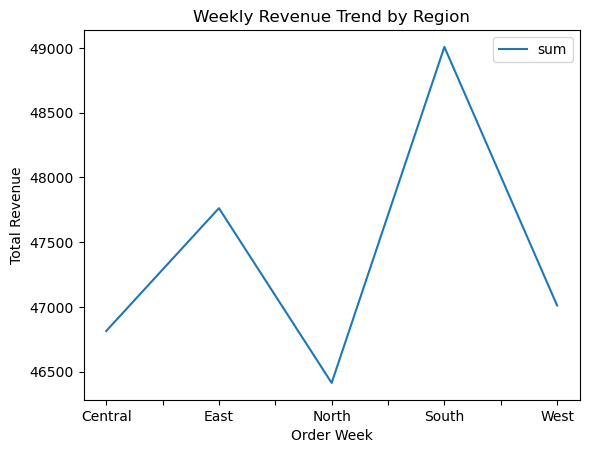

In [75]:
weekly_rev_trend.plot(x='region_x', y='sum', kind='line', title='Weekly Revenue Trend by Region')
plt.xlabel('Order Week')
plt.ylabel('Total Revenue')
plt.show()  


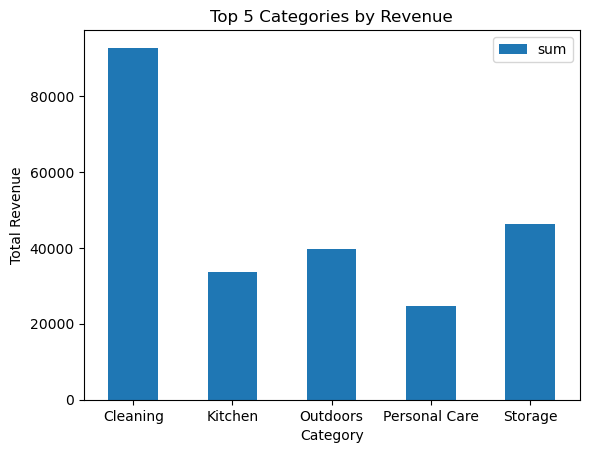

In [76]:
top_5_categories = merged_df.groupby('category')['revenue'].agg(['count', 'sum']).reset_index()

top_5_categories.plot(x='category', y= 'sum', kind='bar', title='Top 5 Categories by Revenue', rot =0)
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.show()  

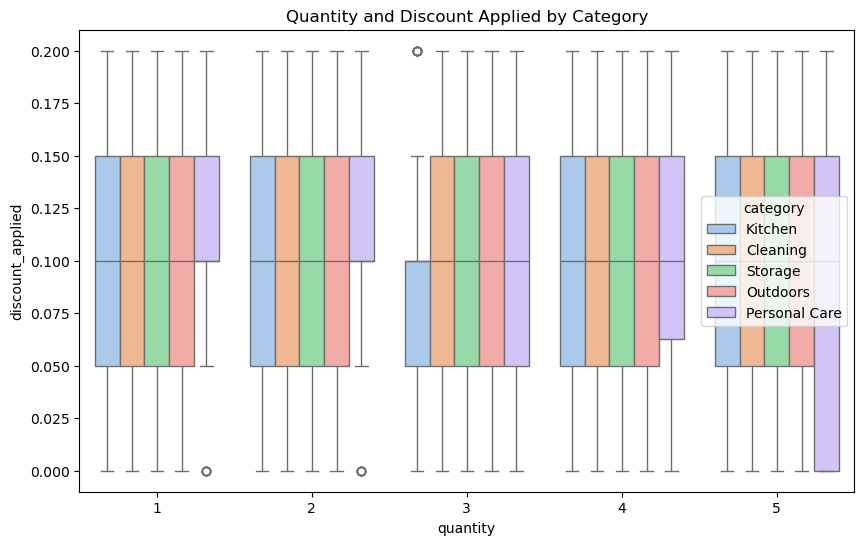

In [77]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='quantity', y ='discount_applied', data = merged_df, hue= 'category', palette ='pastel')
plt.title('Quantity and Discount Applied by Category')
plt.show()

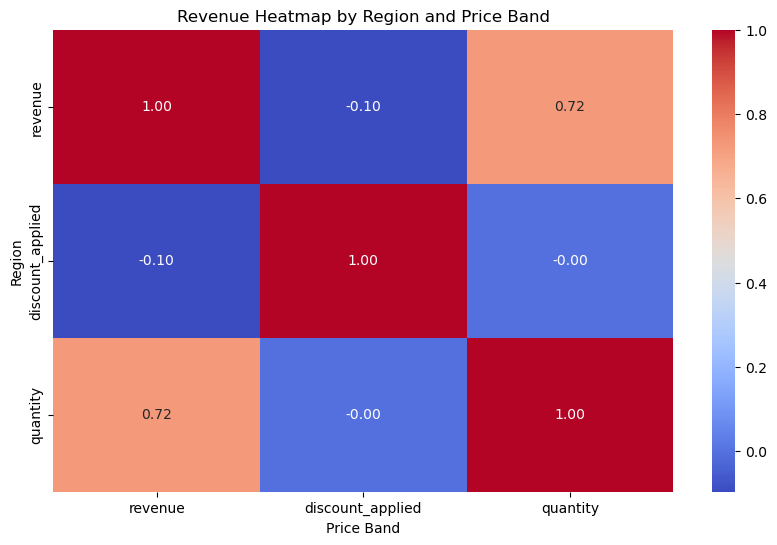

In [78]:
plt.figure(figsize=(10, 6))
sns.heatmap(merged_df[['revenue', 'discount_applied', 'quantity']].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Revenue Heatmap by Region and Price Band')
plt.xlabel('Price Band')
plt.ylabel('Region')
plt.show()  

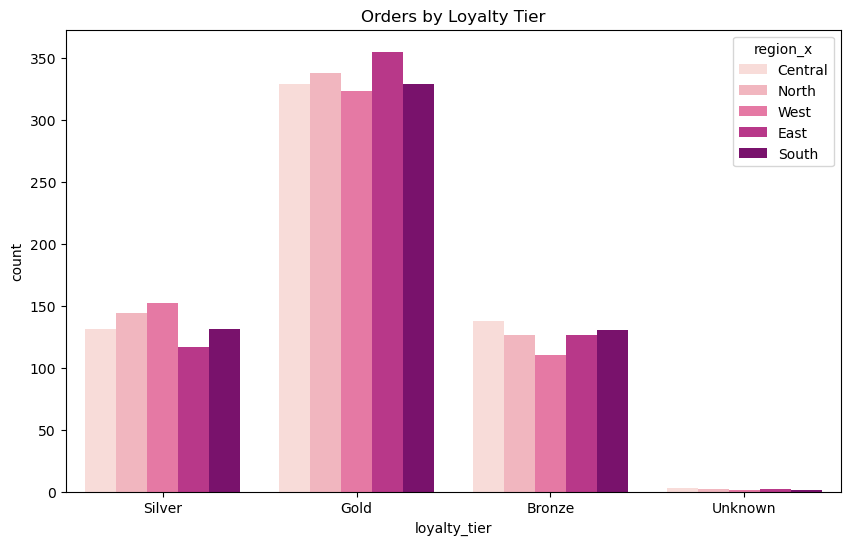

In [79]:
plt.figure(figsize=(10, 6))
sns.countplot(x='loyalty_tier', hue= 'region_x', data = merged_df, palette ='RdPu')
plt.title('Orders by Loyalty Tier')
plt.show()

<Axes: title={'center': 'Revenue Trend Over Time'}, xlabel='signup_date', ylabel='revenue'>

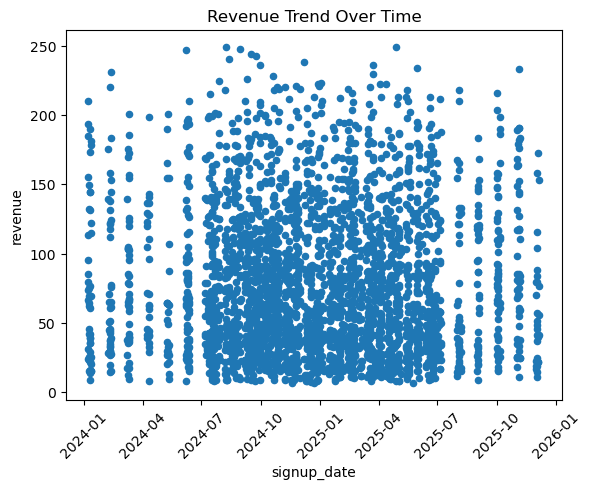

In [80]:
merged_df.plot(x='signup_date', y='revenue', kind='scatter', title='Revenue Trend Over Time', rot=45)

### 7.Optional Stretch Tasks